In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Justin Huang\Science Fair 2022-23/mitbih_train.csv',header=None)
df_test= pd.read_csv(r'C:\Users\Justin Huang\Science Fair 2022-23/mitbih_test.csv',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
#for i in range (87554):
#   if df.iloc[i, 187] != 0:
#        df.iloc[i, 187] = 1

In [5]:
from sklearn.utils import resample
df_1=df_test[df_test[187]==1]
df_2=df_test[df_test[187]==2]
df_3=df_test[df_test[187]==3]
df_4=df_test[df_test[187]==4]
df_0=(df_test[df_test[187]==0]).sample(n=2000,random_state=42)
#optimization spot
df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=2000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=2000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=2000,random_state=42)

df_test=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [6]:
#from sklearn.utils import resample
#df_1=df_test[df_test[187]==1]

#df_0=(df_test[df_test[187]==0]).sample(n=2000,random_state=42)
#optimization spot
#df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=42)

#df_test=pd.concat([df_0,df_1_upsample])

In [7]:
from sklearn.utils import resample
df_1t=df[df[187]==1]
df_2t=df[df[187]==2]
df_3t=df[df[187]==3]
df_4t=df[df[187]==4]
df_0t=(df[df[187]==0]).sample(n=2000,random_state=42)
#optimization spot
df_1_upsamplet=resample(df_1,replace=True,n_samples=2000,random_state=42)
df_2_upsamplet=resample(df_2,replace=True,n_samples=2000,random_state=42)
df_3_upsamplet=resample(df_3,replace=True,n_samples=2000,random_state=42)
df_4_upsamplet=resample(df_4,replace=True,n_samples=2000,random_state=42)

df=pd.concat([df_0t,df_1_upsamplet,df_2_upsamplet,df_3_upsamplet,df_4_upsamplet])

In [8]:
#from sklearn.utils import resample
#df_1t=df[df[187]==1]
#df_0t=(df[df[187]==0]).sample(n=2000,random_state=42)
#optimization spot
#df_1_upsamplet=resample(df_1,replace=True,n_samples=2000,random_state=42)


#df=pd.concat([df_0t,df_1_upsamplet])

In [9]:
y = df[187]
y_valid = df_test[187]
df.pop(187)
df_test.pop(187)

12631    0.0
11106    0.0
14259    0.0
3073     0.0
5617     0.0
        ... 
21300    4.0
21239    4.0
21009    4.0
21297    4.0
20784    4.0
Name: 187, Length: 10000, dtype: float64

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif

In [11]:
scaler=StandardScaler()

In [12]:
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df_test = scaler.transform(df_test)
df_test = pd.DataFrame(df_test)

In [88]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import math


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=df.shape[1:]))
model.add(keras.layers.Dense(64,
                                 kernel_initializer="lecun_normal",
                                 activation="ReLU"))
model.add(keras.layers.Dense(32,
                                 kernel_initializer="lecun_normal",
                                 activation="ReLU"))
model.add(keras.layers.Dense(32,
                                 kernel_initializer="lecun_normal",
                                 activation="ReLU"))

model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [89]:
    import keras.callbacks
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                      restore_best_weights=True)
    #onecycle = OneCycleScheduler(math.ceil(len(X) / 32) * 32, max_rate=0.05)


    history=model.fit(df, y, epochs=100,
              validation_data=(df_test,y_valid),
              callbacks = early_stopping_cb, batch_size=32)# class_weight=class_weights)

Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 0.6966 - accuracy: 0.7318 - val_loss: 0.4413 - val_accuracy: 0.8392
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8579 - val_loss: 0.3060 - val_accuracy: 0.8906
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.8910 - val_loss: 0.2750 - val_accuracy: 0.8954
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.9094 - val_loss: 0.2647 - val_accuracy: 0.8972
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2184 - accuracy: 0.9210 - val_loss: 0.2090 - val_accuracy: 0.9260
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2044 - accuracy: 0.9280 - val_loss: 0.2101 - val_accuracy: 0.9222
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9358 - val_loss: 0.1579 - val_accuracy: 0.9471

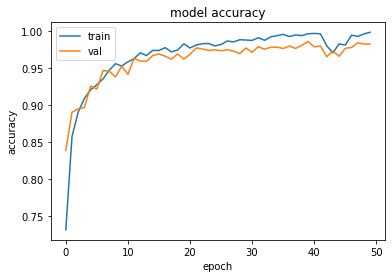

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

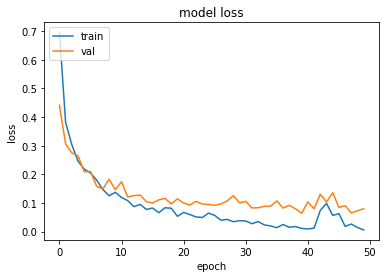

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [92]:
from sklearn import datasets, metrics, model_selection, svm

In [93]:
predictions = model.predict(df_test)

313/313 [==============================] - 0s 842us/step


In [94]:
predictions=np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97      2000
         1.0       0.97      1.00      0.98      2000
         2.0       0.98      1.00      0.99      2000
         3.0       0.99      1.00      0.99      2000
         4.0       0.99      1.00      1.00      2000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [96]:
model.evaluate(df_test, y_valid)

313/313 [==============================] - 0s 954us/step - loss: 0.0641 - accuracy: 0.9862


[0.06413202732801437, 0.9861999750137329]

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_valid, predictions)

array([[1868,   62,   33,   26,   11],
       [   0, 1998,    0,    0,    2],
       [   0,    0, 1996,    4,    0],
       [   0,    0,    0, 2000,    0],
       [   0,    0,    0,    0, 2000]], dtype=int64)

In [99]:
from sklearn.metrics import plot_confusion_matrix

In [100]:
cm = confusion_matrix(y_valid, predictions)

In [101]:
#ax= plt.subplot()
#sns.heatmap(cm/20, annot=True, fmt='g', cmap = 'rocket_r', ax=ax);  
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

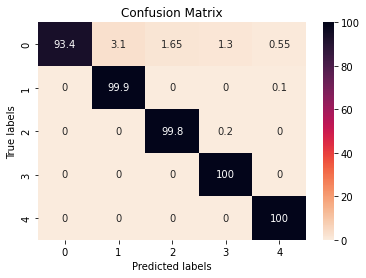

In [102]:
ax= plt.subplot()
sns.heatmap(cm/20, annot=True, fmt='g', cmap = 'rocket_r', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4']); ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4']);